# Evaluation and Recommendations

In this notebook, we will analyze the Twitter content engagement performance of our competitors using the metrics retweets, replies, and quotes. These metrics provide us with insights into how our competitors are engaging with their audience and how we can improve our own content engagement strategy.
* Retweets: Retweets are a measure of how often a tweet is shared with a wider audience. A high number of retweets indicates that a tweet has resonated with users and is being seen by a large number of people.
* Replies: Replies are a measure of how often a tweet is responded to directly by another user. A high number of replies indicates that a tweet is sparking conversation and engagement with users.
* Quotes: Quotes are a measure of how often a tweet is used as a starting point for another user's tweet. A high number of quotes indicates that a tweet is being used to share information or ideas with others.

By analyzing the retweet, reply, and quote rates of our competitors, we can identify which types of content are most engaging with their audience. This information can help us to create more engaging content for our own audience and improve our overall Twitter content engagement strategy.

In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt 

# ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_pickle("pickle_files/topic_dataset.pkl")

In [3]:
df

,user_id,user_name,date,text,tweet_id,is_reply,replies,retweets,quotes,cleaned_text,topic_number,topic_name
0,72579390,innoget,Fri Feb 26 11:35:21 +0000 2016,#Global #Biotech Reagents Market 2016 Industry...,703181551727570944,False,0,0,0,global biotech reagent market industry share r...,1,Challenges and Solutions
1,72579390,innoget,Thu Feb 25 10:15:16 +0000 2016,Tech Transfer Office in #Ohio #University help...,702799011187658752,False,0,0,0,tech transfer office ohio university help staf...,0,Innovation Exploration
2,72579390,innoget,Wed Feb 24 12:10:05 +0000 2016,What’s your point regarding IP protection? Doe...,702465520109559808,False,0,0,0,point regard protection benefit market new pro...,1,Challenges and Solutions
3,72579390,innoget,Tue Feb 23 15:15:17 +0000 2016,New article about #Samsung and its investment ...,702149739492597761,False,0,0,0,new samsung investment biotechnology aim becom...,1,Challenges and Solutions
4,72579390,innoget,Mon Feb 22 12:01:04 +0000 2016,Want to success in Tech Transfer? Visit our bl...,701738474878144513,False,0,0,0,want success tech transfer visit new ten step ...,1,Challenges and Solutions
...,...,...,...,...,...,...,...,...,...,...,...,...
4201,72579390,innoget,Thu Jun 16 09:42:40 +0000 2016,#Science2society starts to boost #innovation e...,743378248818638848,False,0,5,0,science start boost innovation efficiency acro...,0,Innovation Exploration
4202,72579390,innoget,Mon Jun 13 10:08:17 +0000 2016,#Science2society starts to boost innovation ef...,742297531594465280,False,0,3,0,science start boost innovation efficiency acro...,0,Innovation Exploration
4203,72579390,innoget,Wed Apr 27 08:04:02 +0000 2016,@innoget is attending the Open Innovation Summ...,725234035593744384,False,0,1,0,attend open innovation summit london hold open...,0,Innovation Exploration
4204,72579390,innoget,Mon Mar 21 08:25:54 +0000 2016,IoT Development Enters the Open Innovation Cra...,711831185161375744,False,0,0,0,iot development enter open innovation craze,0,Innovation Exploration


We can quickly observe that a large number of tweets have not been retweeted, replied to, or quoted. Let's calculate the percentage of tweets that have a non-zero value for these metrics.

Based on the chart, we can draw the following interpretation:
* The majority of tweets in the dataset have not received replies, with only 6.34% of tweets having replies. This suggests that the engagement level in terms of direct responses to tweets is relatively low.

* Retweets are more prevalent compared to replies and quotes, with 25.68% of tweets being retweeted. This indicates that a significant number of tweets have resonated with users and have been shared with a wider audience.

* Quotes are the least common interaction, with only 4.79% of tweets being quoted. This suggests that users are less inclined to quote tweets in their own posts compared to retweeting or replying.

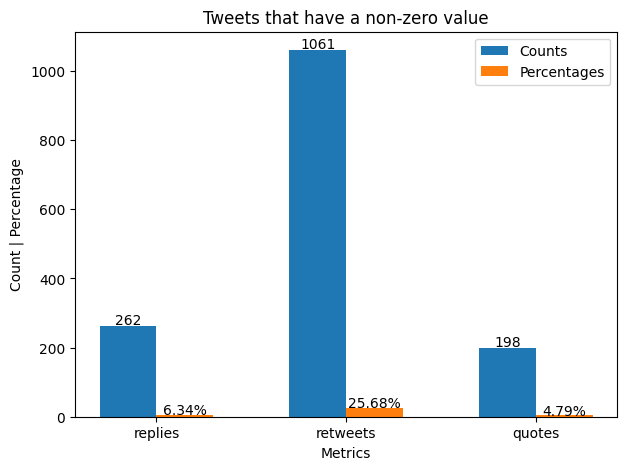

In [5]:
# calculate the number of tweets & percentage that have a non-zero value for each metrics
total_tweets = len(df)

metrics = ['replies', 'retweets', 'quotes']
counts = [(df[metric] != 0).sum() for metric in metrics]
percentages = [(count / total_tweets) * 100 for count in counts]

# plot the barchart
width = 0.3
fig, ax = plt.subplots(figsize=(7, 5))
x = np.arange(len(metrics))

ax.bar(x - width/2, counts, width, label='Counts')
ax.bar(x + width/2, percentages, width, label='Percentages')

# add the labels and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Count | Percentage')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_title("Tweets that have a non-zero value")
ax.legend()

# add data labels 
for i in range(len(metrics)):
    ax.text(x[i] - width/2, counts[i]+5, counts[i], ha='center')
    ax.text(x[i] + width/2, percentages[i]+0.5, f"{percentages[i]:.2f}%", ha='center')

plt.show()

Based on the chart, we can draw the following interpretation:
* The majority of tweets in the dataset have not received replies, with only 6.34% of tweets having replies. This suggests that the engagement level in terms of direct responses to tweets is relatively low.

* Retweets are more prevalent compared to replies and quotes, with 25.68% of tweets being retweeted. This indicates that a significant number of tweets have resonated with users and have been shared with a wider audience.

* Quotes are the least common interaction, with only 4.79% of tweets being quoted. This suggests that users are less inclined to quote tweets in their own posts compared to retweeting or replying.

In short, the general engagement rate is low. Next, we will analyze these numbers of each company.

In [6]:
metrics = ['replies', 'retweets', 'quotes']
user_names = df['user_name'].unique()

results = pd.DataFrame({'Company': user_names})

for metric in metrics:
    counts = []
    percentages = []
    for user_name in user_names:
        user_data = df[df['user_name'] == user_name]
        count = (user_data[metric] != 0).sum()
        percentage = (count / len(user_data)) * 100
        counts.append(count)
        percentages.append(percentage)
    results[f'{metric}_count'] = counts
    results[f'{metric}_percentage'] = percentages
print("Tweets that have non-zero values")
results

Tweets that have non-zero values


,Company,replies_count,replies_percentage,retweets_count,retweets_percentage,quotes_count,quotes_percentage
0,innoget,15,2.158273,139,20.000000,4,0.575540
1,IN_PART,33,4.896142,144,21.364985,41,6.083086
2,NineSigma,18,2.597403,276,39.826840,42,6.060606
3,WazokuHq,31,4.111406,176,23.342175,19,2.519894
4,MomentiveAI,150,30.864198,248,51.028807,82,16.872428
5,yet2com,15,1.809409,78,9.408926,10,1.206273


Overall, MomentiveAI has the highest overall engagement rate, followed by WazokuHq and NineSigma. IN_PART has the highest reply rate, but its retweet and quote rates are lower than the average. innoget has the lowest overall engagement rate.

The next step is to analyze the number of tweets by topic and the engagement rate. This analysis will provide insights into the distribution of tweets across different topics and the level of engagement each topic generates. We will explore how the topics relate to the overall engagement rate and identify any patterns or trends that emerge.

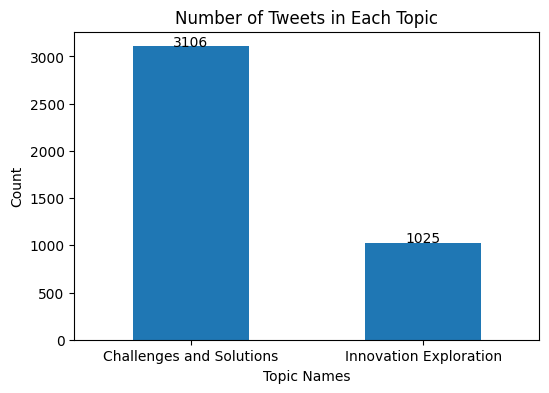

In [7]:
plt.figure(figsize=(6, 4))
topic_counts = df['topic_name'].value_counts()
topic_counts.plot(kind='bar')
plt.title('Number of Tweets in Each Topic')
plt.xlabel('Topic Names')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add data labels on top of each bar
for i, count in enumerate(topic_counts):
    plt.text(i, count + 5, count, ha='center')

plt.show()

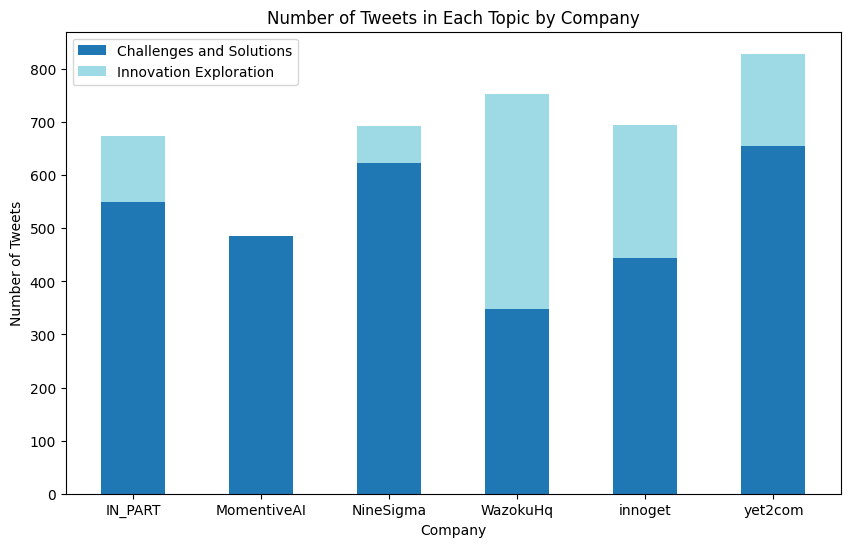

In [8]:
# number of tweets in each topic by company

# group the data by user_name and topic_name, and count the number of tweets in each group
grouped_data = df.groupby(['user_name', 'topic_name']).size().unstack()

# get the list of user_names and topic names
user_names = grouped_data.index
topic_names = grouped_data.columns

# plot the chart
bar_width = 0.5
fig, ax = plt.subplots(figsize=(10, 6))
bottom = np.zeros(len(user_names))
colors = plt.cm.get_cmap('tab20', len(topic_names))

for i, topic in enumerate(topic_names):
    ax.bar(user_names, grouped_data[topic], bottom=bottom, width=bar_width, label=topic, color=colors(i))
    bottom += grouped_data[topic]

# ad labels, legend, title
ax.set_xlabel('Company')
ax.set_ylabel('Number of Tweets')
ax.set_title('Number of Tweets in Each Topic by Company')
ax.legend()

plt.xticks(rotation=0)
plt.show()

Considering the varying total number of tweets from each company, we will calculate the relative percentage of each topic to provide a more comprehensive understanding of topic distribution within each company

In [9]:
# group the data by user_name and topic_name, and count the number of tweets in each group
grouped_data = df.groupby(['user_name', 'topic_name']).size().unstack()

# calculate the percentage of each topic in each company
topic_percentages = (grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100).round(2)

# calculate the total number of tweets for each company
total_tweets = grouped_data.sum(axis=1)

# calculate the percentage of each topic relative to the total number of tweets for each company
topic_percentages_relative = (grouped_data.div(total_tweets, axis=0) * 100).round(2)

# store all numbers in a df
result_df = pd.concat([grouped_data, topic_percentages, topic_percentages_relative], axis=1, keys=['Count', 'Percentage', 'Relative Percentage'])
result_df

Count                         \
topic_name  Challenges and Solutions Innovation Exploration   
user_name                                                     
IN_PART                          550                    124   
MomentiveAI                      485                      1   
NineSigma                        624                     69   
WazokuHq                         348                    406   
innoget                          444                    251   
yet2com                          655                    174   

                          Percentage                         \
topic_name  Challenges and Solutions Innovation Exploration   
user_name                                                     
IN_PART                        81.60                  18.40   
MomentiveAI                    99.79                   0.21   
NineSigma                      90.04                   9.96   
WazokuHq                       46.15                  53.85   
innoget                        63.88                  36.12   
yet2com                        79.01                  20.99   

                 Relative Percentage                         
topic_name  Challenges and Solutions Innovation Exploration  
user_name                                                    
IN_PART                        81.60                  18.40  
MomentiveAI                    99.79                   0.21  
NineSigma                      90.04                   9.96  
WazokuHq                       46.15                  53.85  
innoget                        63.88                  36.12  
yet2com                        79.01                  20.99

From the results, we can draw the following conclusions:

* **Challenges and Solutions**: IN_PART (81.60%), NineSigma (90.04%), and yet2com (79.01%) focus on this topic, while MomentiveAI (99.79%) focuses almost exclusively on it.
* **Innovation Exploration**: WazokuHq (53.85%) and innoget (36.12%) focus on this topic, while the other companies focus more on Challenges and Solutions.

Overall, companies such as "IN_PART" and "NineSigma" exhibit a stronger focus on addressing challenges, while companies like "WazokuHq" and "innoget" prioritize exploring innovative ideas. 

Next, we will examine the count and percentage of tweets with replies and retweets within each topic in order to gain insights into the level of interaction and audience engagement associated with different topics. 

In [10]:
# calculate the number of tweets with replies in each topic
replies_count_by_topic = df[df['replies'] != 0].groupby('topic_name').size()

# calculate the number of tweets with retweets in each topic
retweets_count_by_topic = df[df['retweets'] != 0].groupby('topic_name').size()

# calculate the total number of tweets per topic
total_tweets_by_topic = df.groupby('topic_name').size()

# calculate the percentage of tweets with replies in each topic
replies_percentage_by_topic = (replies_count_by_topic / total_tweets_by_topic * 100).round(2)

# calculate the percentage of tweets with retweets in each topic
retweets_percentage_by_topic = (retweets_count_by_topic / total_tweets_by_topic * 100).round(2)

# create a single DataFrame to store the results
tweet_engagement_df = pd.DataFrame({
    'Replies Count': replies_count_by_topic,
    'Replies %': replies_percentage_by_topic,
    'Retweets Count': retweets_count_by_topic,
    'Retweets %': retweets_percentage_by_topic
})

tweet_engagement_df

,Replies Count,Replies %,Retweets Count,Retweets %
topic_name,,,,
Challenges and Solutions,234,7.53,818,26.34
Innovation Exploration,28,2.73,243,23.71


The "Challenges and Solutions" topic generates more engagement in terms of both replies and retweets, suggesting active discussions and sharing of content. On the other hand, the "Innovation Exploration" topic exhibits lower levels of direct interaction through replies but still garners considerable engagement through retweets.

## Recommendations

Based on the analysis of competitors and their engagement with different topics, I would recommend the following approach for a company starting to write tweets on Twitter:

1. Incorporate "Challenges and Solutions" Topic:

* The topic of "Challenges and Solutions" has shown significant engagement, with a higher count of tweets and retweets.
* Focus on addressing industry challenges, sharing insights, and offering practical solutions relevant to your company's domain.
* Encourage discussions by asking questions, seeking input from the audience, and actively responding to replies.
* Share success stories, case studies, and real-world examples that demonstrate how your company addresses challenges effectively.

2. Emphasize "Innovation Exploration" Topic:
* While the count of tweets with replies in the "Innovation Exploration" topic was relatively lower, it exhibited a higher count of retweets.
* Promote innovative ideas, emerging trends, and cutting-edge technologies within your industry.
* Share thought-provoking content, such as thought leadership articles, research findings, and insights on future developments.
* Showcase your company's innovative initiatives, projects, and collaborations to capture audience attention and foster engagement.
* Encourage retweets by sharing unique and inspiring content that resonates with your target audience.

## Limitations and Areas for Further Research

There are three main limitations of this project:
* **Limited data**: The final dataset is around 4k tweets, which is quite small to draw conclusions about engagement.
* **Not diverse subject**: The subject is not diverse in nature, which makes it difficult to come up with topics that are significantly different.
* **Low engagement performance**: The current engagement performance is low, which suggests that the tweets are not resonating with the target audience.

One suggestion to address the limited data is to increase the size of the dataset. This could be done by looking at tweets from a wider range of companies or industries. This would allow us to have better topic modeling, which would help us to identify the most engaging topics. It would also allow us to draw more accurate conclusions about engagement.